In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2 
import functions as fc

In [17]:
ctx = straxbra.XebraContext()
run = '00188'
peaks_data = ctx.get_array(run, 'peaks')
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [18]:
##### CutCondition_strict s1 preselection########

def Process(waveform,i, aii, bii, timestamp): 
    SelectionCutFlag = fc.CutCondition(waveform[i])
    if SelectionCutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if fc.S2_found(integral = integral[i+j], width = width[i+j]):
                k=1
                s2_index_with_ds_first.append(j)
                s2_counter_timestamp = timestamp[i+j+k]
                z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
                while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:
                    if fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]):
                          s2_index_with_ds_second.append(j+k)
                    
                    if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
                        ctime       = timestamp[i+j] - timestamp[i]
                        s2 =integral[i+j]
                        s2_width= width[i+j]
                        s2_list.append(s2)
                        s2_list_width.append(width[i+j])
                        s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
                        cs2_list.append(s2_corrected)
                        s2_index_without_ds.append(j)
#                         if s2 > 7000 and s2_width > 500:
#                             fc.PrintWaveform(waveform,i)
#                             print(width[i+j])
                        return
                    else:
                        return
                return
            else:
                return
    else:
        return

In [19]:
# ##### CutCondition s1 preselection########

# def Process(waveform,i, aii, bii, timestamp): 
#     SelectionCutFlag = fc.CutCondition(waveform[i])
#     if SelectionCutFlag == True:
#         j = 1
#         counter_timestamp = timestamp[i+j]
#         threshold_timestamp = timestamp[i] + 45000
#         while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False:  
#             j += 1
#             counter_timestamp = timestamp[i+j]
#         else:
#             if fc.S2_found(integral = integral[i+j], width = width[i+j]):
#                 k=1 
#                 s2_counter_timestamp = timestamp[i+j+k]
#                 z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
#                     k += 1
#                     s2_counter_timestamp = timestamp[i+j+k]
#                 else:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
#                         ctime       = timestamp[i+j] - timestamp[i]
#                         s2 =integral[i+j]
#                         s2_width= width[i+j]
#                         s2_list.append(s2)
#                         s2_list_width.append(width[i+j])
#                         s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
#                         cs2_list.append(s2_corrected)
#                         s2_index_without_ds.append(j)
# #                         if s2 > 7000 and s2_width > 500:
# #                             fc.PrintWaveform(waveform,i)
# #                             print(width[i+j])
#                         return
#                     else:
#                         return
#                 return
#             else:
#                 return
#     else:
#         return

In [20]:
# ###### CutCondition s1 preselection, CutCondition s1 within 45us########

# def Process(waveform,i, aii, bii, timestamp): 
#     SelectionCutFlag = fc.CutCondition(waveform[i])
#     if SelectionCutFlag == True:
#         j = 1
#         counter_timestamp = timestamp[i+j]
#         threshold_timestamp = timestamp[i] + 45000
#         while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False and fc.CutCondition(waveform = waveform[i+j]) == False:  
#             j += 1
#             counter_timestamp = timestamp[i+j]
#         else:
#             if fc.S2_found(integral = integral[i+j], width = width[i+j]):
#                 k=1 
#                 s2_counter_timestamp = timestamp[i+j+k]
#                 z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
#                     k += 1
#                     s2_counter_timestamp = timestamp[i+j+k]
#                 else:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
#                         ctime       = timestamp[i+j] - timestamp[i]
#                         s2 =integral[i+j]
#                         s2_list.append(s2)
#                         s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
#                         cs2_list.append(s2_corrected)
#                         return
#                     else:
#                         return
#                 return
#             else:
#                 return
#     else:
#         return

In [21]:
# ###### CutCondition_strict s1 preselection, CutCondition s1 within 45us########

# def Process(waveform,i, aii, bii, timestamp): 
#     SelectionCutFlag = fc.CutCondition_strict(waveform[i], integral[i], width[i])
#     if SelectionCutFlag == True:
#         j = 1
#         counter_timestamp = timestamp[i+j]
#         threshold_timestamp = timestamp[i] + 45000
#         while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False and fc.CutCondition(waveform = waveform[i+j]) == False:  
#             j += 1
#             counter_timestamp = timestamp[i+j]
#         else:
#             if fc.S2_found(integral = integral[i+j], width = width[i+j]):
#                 k=1 
#                 s2_counter_timestamp = timestamp[i+j+k]
#                 z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
#                     k += 1
#                     s2_counter_timestamp = timestamp[i+j+k]
#                 else:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
#                         ctime       = timestamp[i+j] - timestamp[i]
#                         s2 =integral[i+j]
#                         s2_list.append(s2)
#                         s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
#                         cs2_list.append(s2_corrected)
#                         return
#                     else:
#                         return
#                 return
#             else:
#                 return
#     else:
#         return

In [22]:
# ###### CutCondition_strict s1 preselection, CutCondition_strict s1 within 45us########

# def Process(waveform,i, aii, bii, timestamp): 
#     SelectionCutFlag = fc.CutCondition_strict(waveform[i], integral[i], width[i])
#     if SelectionCutFlag == True:
#         j = 1
#         counter_timestamp = timestamp[i+j]
#         threshold_timestamp = timestamp[i] + 45000
#         while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False and fc.CutCondition_strict(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]) == False:  
#             j += 1
#             counter_timestamp = timestamp[i+j]
#         else:
#             if fc.S2_found(integral = integral[i+j], width = width[i+j]):
#                 k=1 
#                 s2_counter_timestamp = timestamp[i+j+k]
#                 z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
#                     k += 1
#                     s2_counter_timestamp = timestamp[i+j+k]
#                 else:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
#                         ctime       = timestamp[i+j] - timestamp[i]
#                         s2 =integral[i+j]
#                         s2_list.append(s2)
#                         s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
#                         cs2_list.append(s2_corrected)
#                         return
#                     else:
#                         return
#                 return
#             else:
#                 return
#     else:
#         return

In [23]:
# ##### CutCondition s1 preselection, CutCondition_strict s1 within 45us########


# def Process(waveform,i, aii, bii, timestamp): 
#     SelectionCutFlag = fc.CutCondition(waveform[i])
#     if SelectionCutFlag == True:
#         j = 1
#         counter_timestamp = timestamp[i+j]
#         threshold_timestamp = timestamp[i] + 45000
#         while threshold_timestamp >= counter_timestamp and fc.S2_found(integral = integral[i+j], width = width[i+j]) == False and fc.CutCondition_strict(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]) == False:  
#             j += 1
#             counter_timestamp = timestamp[i+j]
#         else:
#             if fc.S2_found(integral = integral[i+j], width = width[i+j]):
#                 k=1 
#                 s2_counter_timestamp = timestamp[i+j+k]
#                 z_position = fc.drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 while threshold_timestamp >= s2_counter_timestamp and fc.S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
#                     k += 1
#                     s2_counter_timestamp = timestamp[i+j+k]
#                 else:
#                     if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
#                         ctime       = timestamp[i+j] - timestamp[i]
#                         s2 =integral[i+j]
#                         s2_list.append(s2)
#                         s2_corrected = s2/(np.exp(-ctime/(200*1e3)))
#                         cs2_list.append(s2_corrected)
#                         return
#                     else:
#                         return
#                 return
#             else:
#                 return
#     else:
#         return

In [24]:
left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 23
s2_list= []
s2_list_width = []
cs2_list = []
s2_index_with_ds_first = []
s2_index_with_ds_second = []
s2_index_without_ds = []

In [25]:
num = len(waveform)
print_counter = 0.0
for i in range(0,num-10):    
    Process(waveform,i, aii=a, bii=b, timestamp=timestamp)
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
print(1.0, '        Run ',run, 'done!')

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00188 done!


In [26]:
print(len(s2_list))

10975


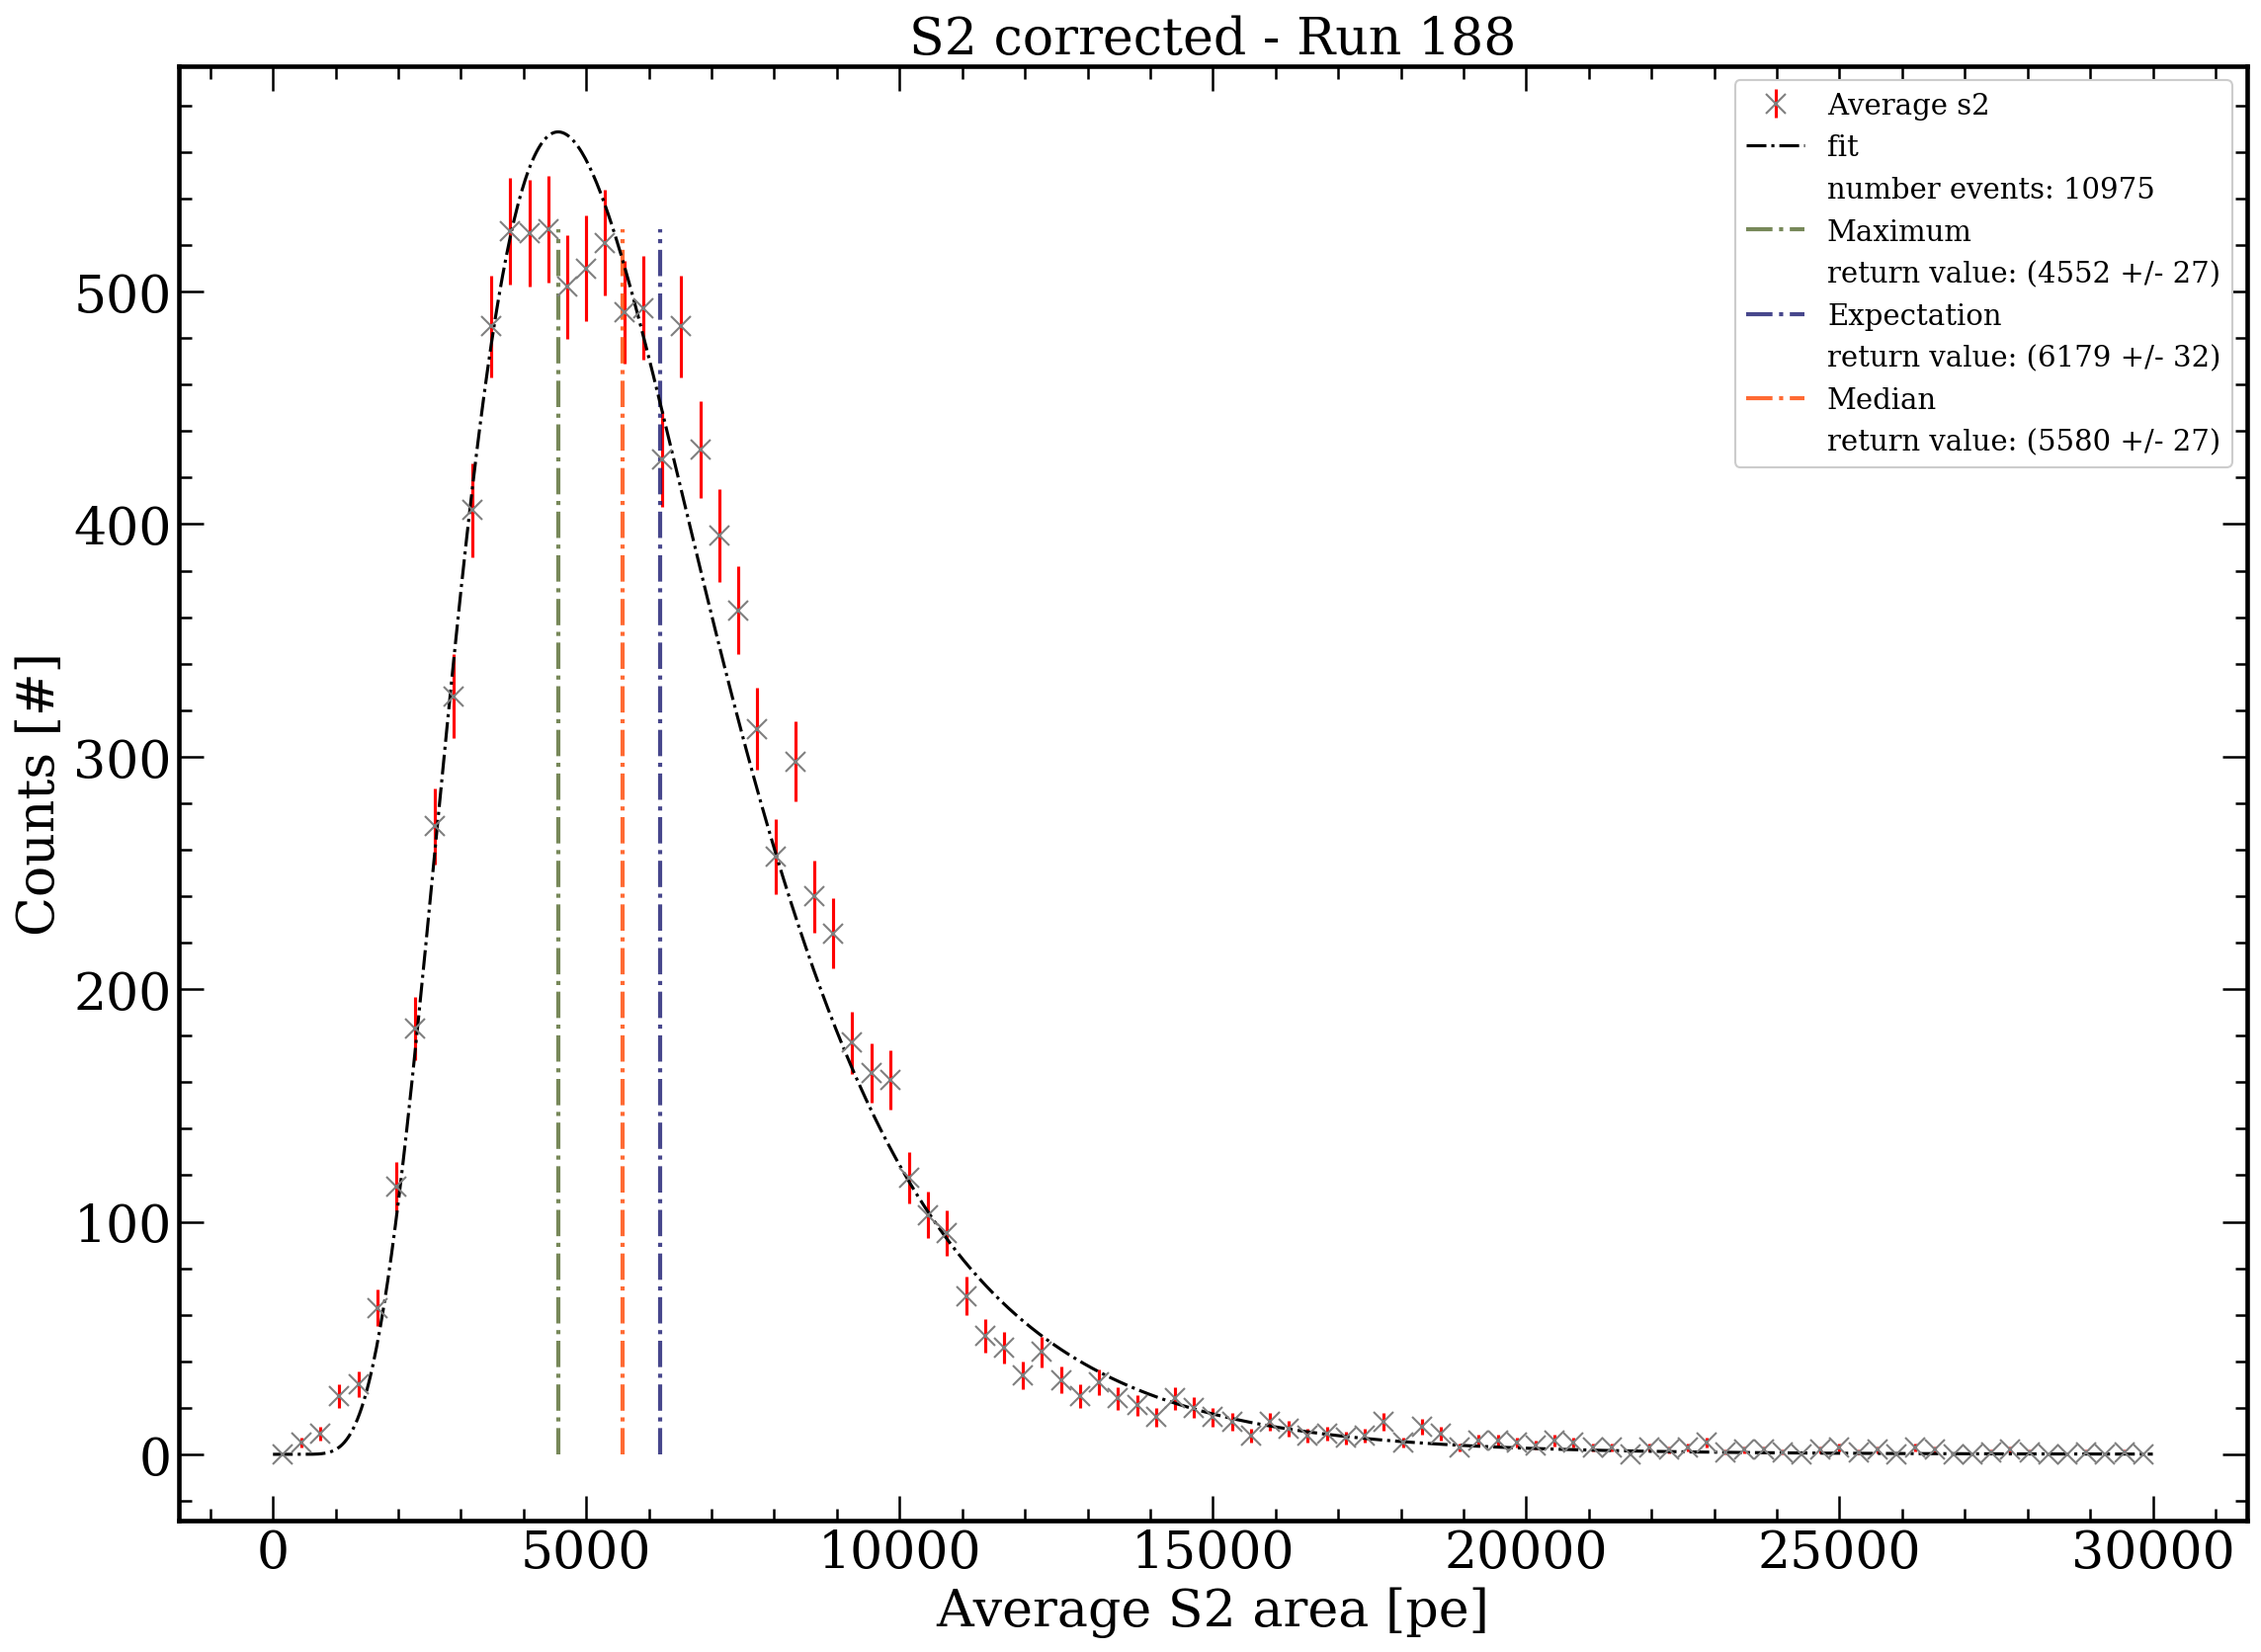

In [27]:
fig, axes = ps.styles()
poisson_list = []
p0 = [10,10,10]
#p0 = [200,12000,200]
x_range = np.linspace(1, 30000,1000)
counts, binEdges = np.histogram(cs2_list, bins=np.linspace(1,30000,100))
for i in counts:
    q= fc.poisson_interval(i)[1]
    poisson_list.append(q)

bincenters= 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov = curve_fit(fc.log_fit, bincenters, counts, p0,  sigma = poisson_list, absolute_sigma = True, maxfev = 10000)
perr = np.sqrt(np.diag(pcov))



expectation_maximum = np.exp(popt[1]-popt[2]**2)
diff_mu_maximum = expectation_maximum
diff_sigma_maximum = expectation_maximum * 2 * popt[2]
error_mu = perr[1]
error_sigma = perr[2] 
error_maximum = np.sqrt(diff_mu_maximum**2 * error_mu**2 + diff_sigma_maximum**2 * error_sigma**2)

expectation = np.exp(popt[1]+((popt[2]**2)/2))
diff_mu = expectation
diff_sigma = expectation*popt[2]
error_mu = perr[1]
error_sigma = perr[2]   
error = np.sqrt(diff_mu**2 * error_mu**2 + diff_sigma**2 * error_sigma**2)


expectation_median = np.exp(popt[1])
diff_mu_median = expectation_median
error_mu_median = perr[1]
error_median = np.sqrt(diff_mu_median**2 * error_mu_median**2)



s2_mu_median= f"{expectation_median:.0f}"
s2_error_median = f"{error_median:.0f}"

s2_mu_maximum = f"{expectation_maximum:.0f}"
s2_error_maximum = f"{error_maximum:.0f}"

s2_mu_expectation = f"{expectation:.0f}"
s2_error_expectation = f"{error:.0f}"

s2_list_range = str(len(s2_list))



S2_sigma = np.exp(popt[1]+((popt[2]**2)/2))    * np.sqrt(np.exp(popt[2]**2)-1)
FWHM_diff_mu = S2_sigma
FWHM_diff_sigma = expectation * popt[2] * (np.sqrt(np.exp(popt[2]**2)-1)+1/(np.sqrt(np.exp(popt[2]**2)-1))*np.exp(popt[2]**2)) 
S2_sigma_error = np.sqrt(FWHM_diff_mu**2 *error_mu**2 + FWHM_diff_sigma**2 * error_sigma**2 )
S2_sigma = "%.0f" % S2_sigma
S2_sigma_error = "%.0f" % S2_sigma_error





# expectation_value = np.digitize(float(s2_mu),bincenters)

plt.errorbar(bincenters, counts, yerr=np.sqrt(counts), marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red', label='Average s2')


axes.plot([], [], ' ', label="number events: "+s2_list_range)
axes.plot(x_range,fc.log_fit(x_range,*popt), color = 'k', linestyle = '-.', label = 'fit')


axes.vlines(x = float(s2_mu_expectation), ymin = 0, ymax =(max(counts)), linestyle = '-.', linewidth = 2, alpha = 0.8, color = 'midnightblue', label ='Expectation')
axes.plot([], [], ' ', label="return value: ("+s2_mu_expectation +' +/- '+ s2_error_expectation+')')



axes.vlines(x = float(s2_mu_maximum), ymin = 0, ymax =(max(counts)), linestyle = '-.', linewidth = 2, alpha = 0.8, color = 'darkolivegreen', label ='Maximum') 
axes.plot([], [], ' ', label="return value: ("+s2_mu_maximum +' +/- '+ s2_error_maximum+')')

axes.vlines(x = float(s2_mu_median), ymin = 0, ymax =(max(counts)), linestyle = '-.', linewidth = 2, alpha = 0.8, color = 'orangered', label ='Median') 
axes.plot([], [], ' ', label="return value: ("+s2_mu_median +' +/- '+ s2_error_median+')')


#axes.plot([], [], ' ', label='$1 \sigma$ = ('        + S2_sigma + ' +/- '+S2_sigma_error+')')





handles,labels = axes.get_legend_handles_labels()
handles = [handles[8],handles[1],handles[0],handles[6],handles[3],handles[5],handles[2],handles[7],handles[4]]
labels = [labels[8],labels[1],labels[0],labels[6],labels[3],labels[5],labels[2],labels[7],labels[4]]
axes.legend(handles,labels, loc = 1,prop={'size': 14}, fancybox=True, framealpha=1)


axes.set_title('S2 corrected - Run '+run[2:])
axes.set_ylabel('Counts [#]')
axes.set_xlabel('Average S2 area [pe]')
plt.show()

In [28]:
print(len(s2_list_width))

10975


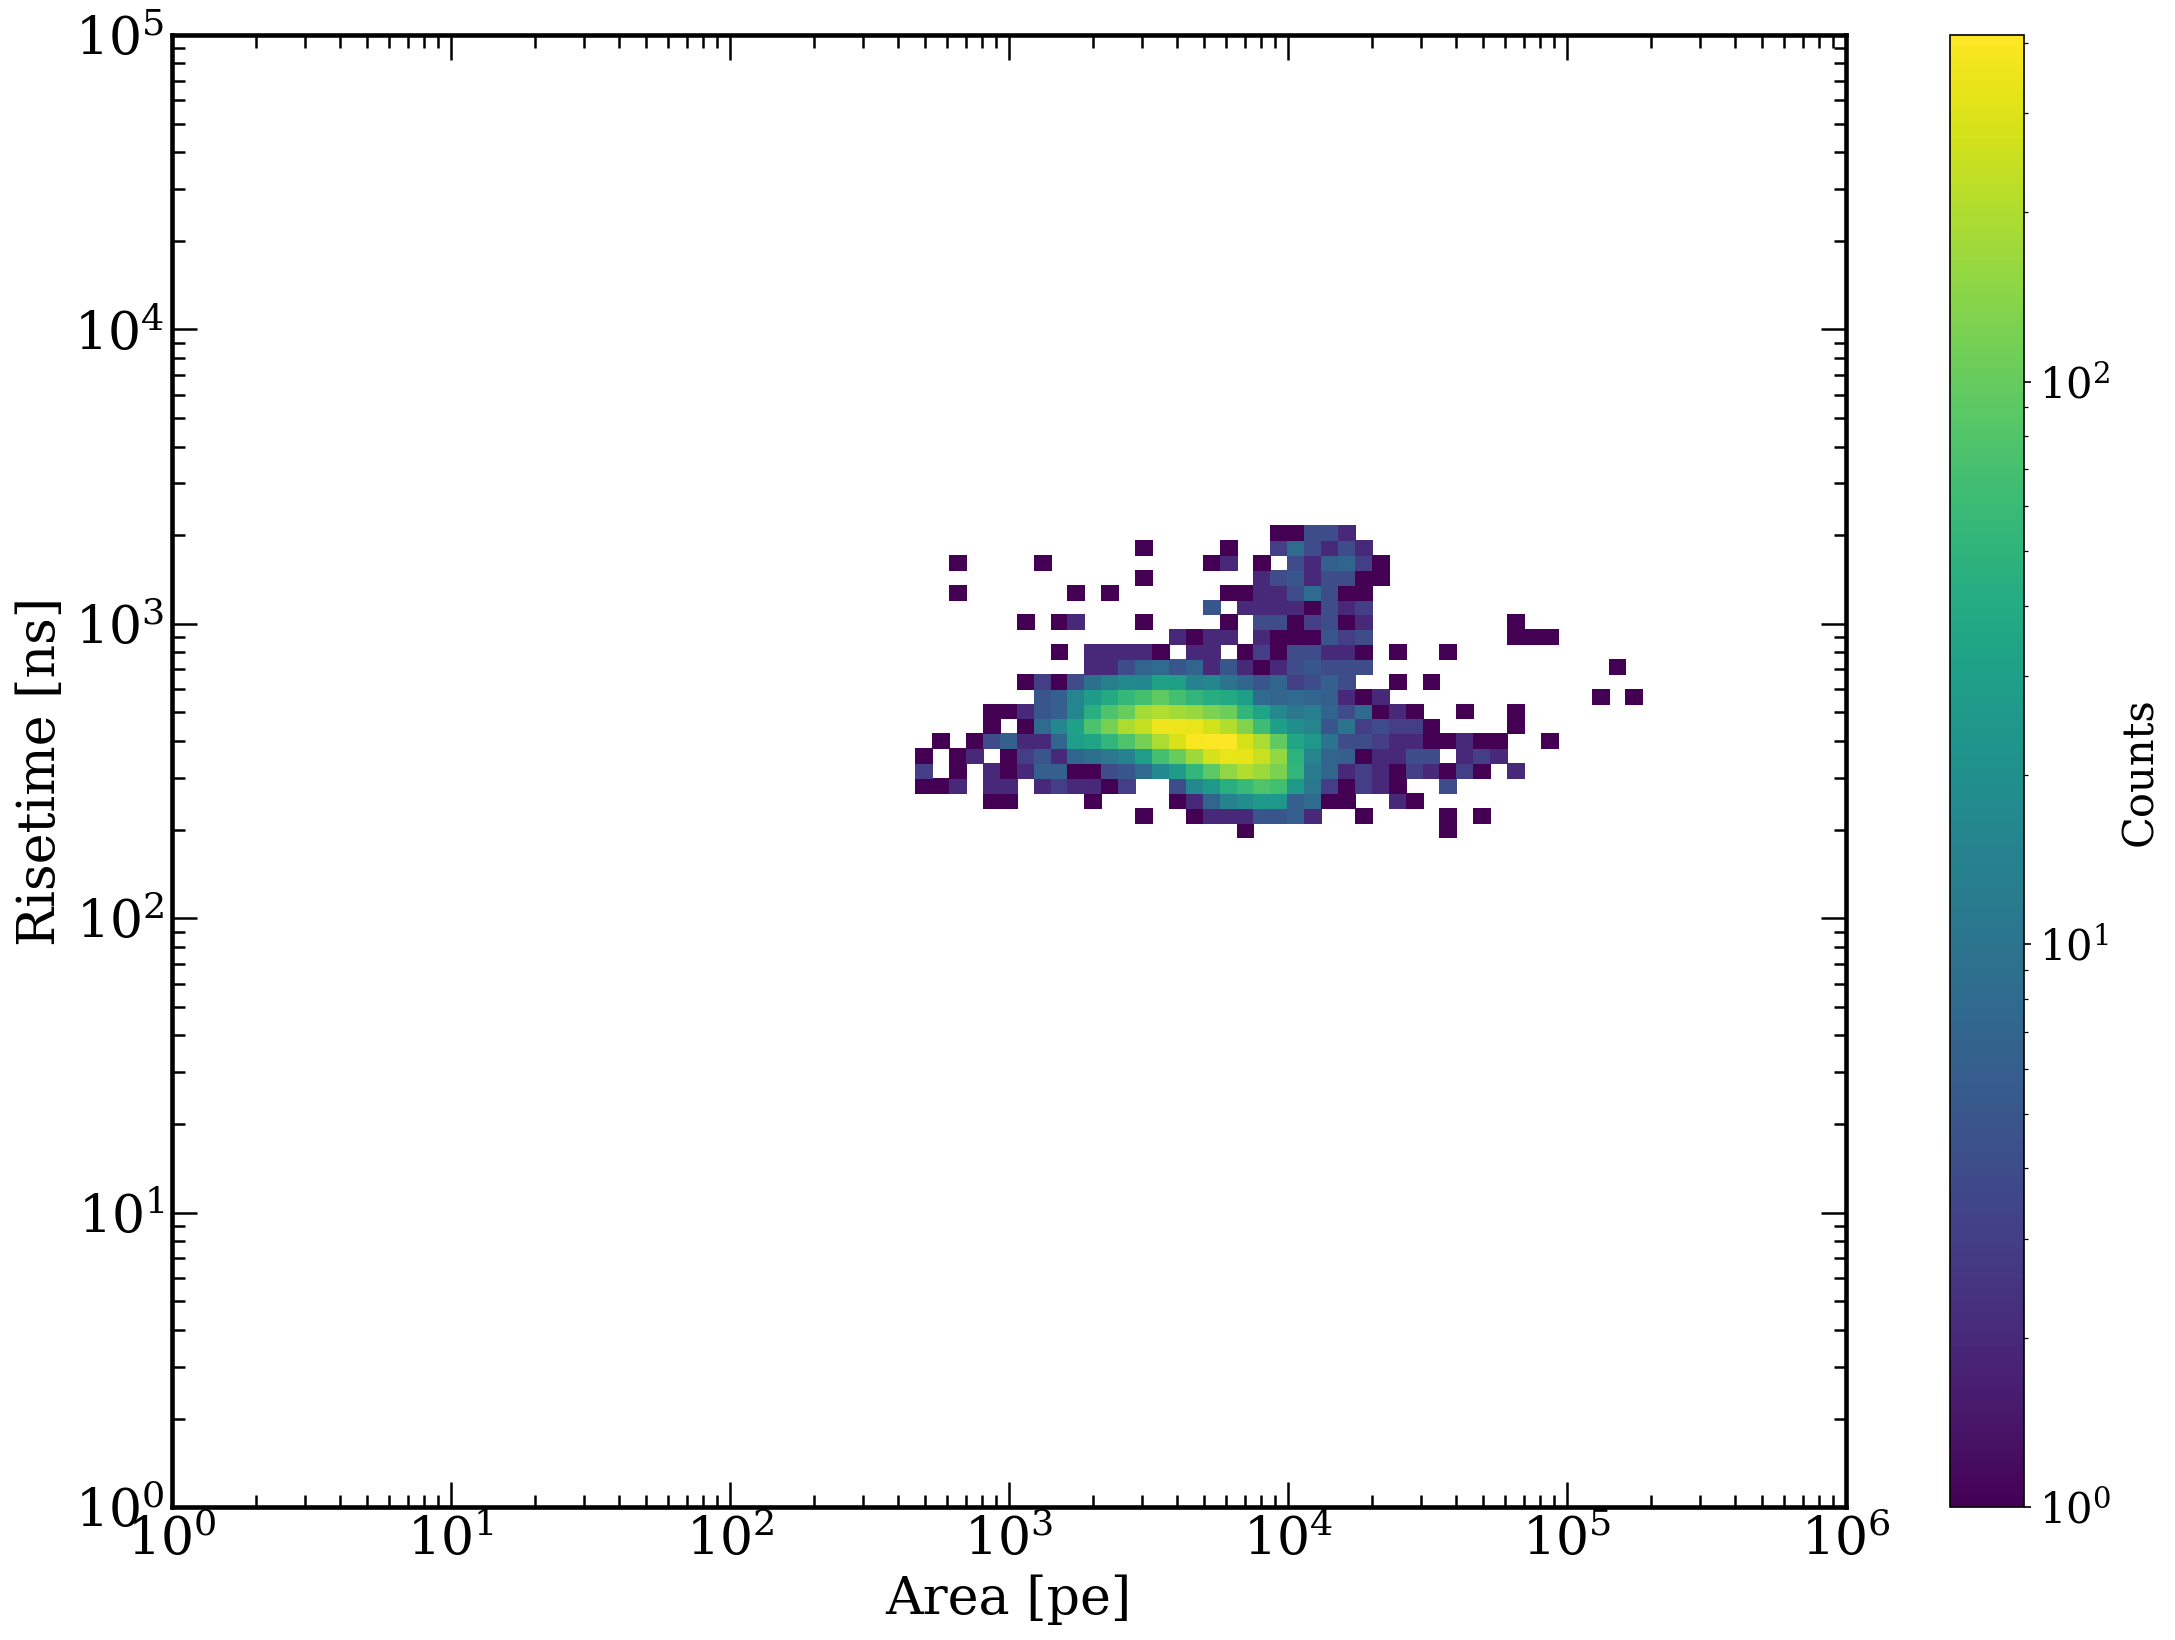

310779


In [29]:
fig, axes = ps.styles()

bins_x = np.logspace(0,6,100)
bins_y = np.logspace(0,5,100)
histo_max= 2*10**3


counts, _, _ = np.histogram2d(s2_list, s2_list_width, bins=(bins_x, bins_y))
im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm())
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Risetime [ns]')

SIZE = 20
EXTRA_SIZE = 30


plt.show()
print(len(waveform))

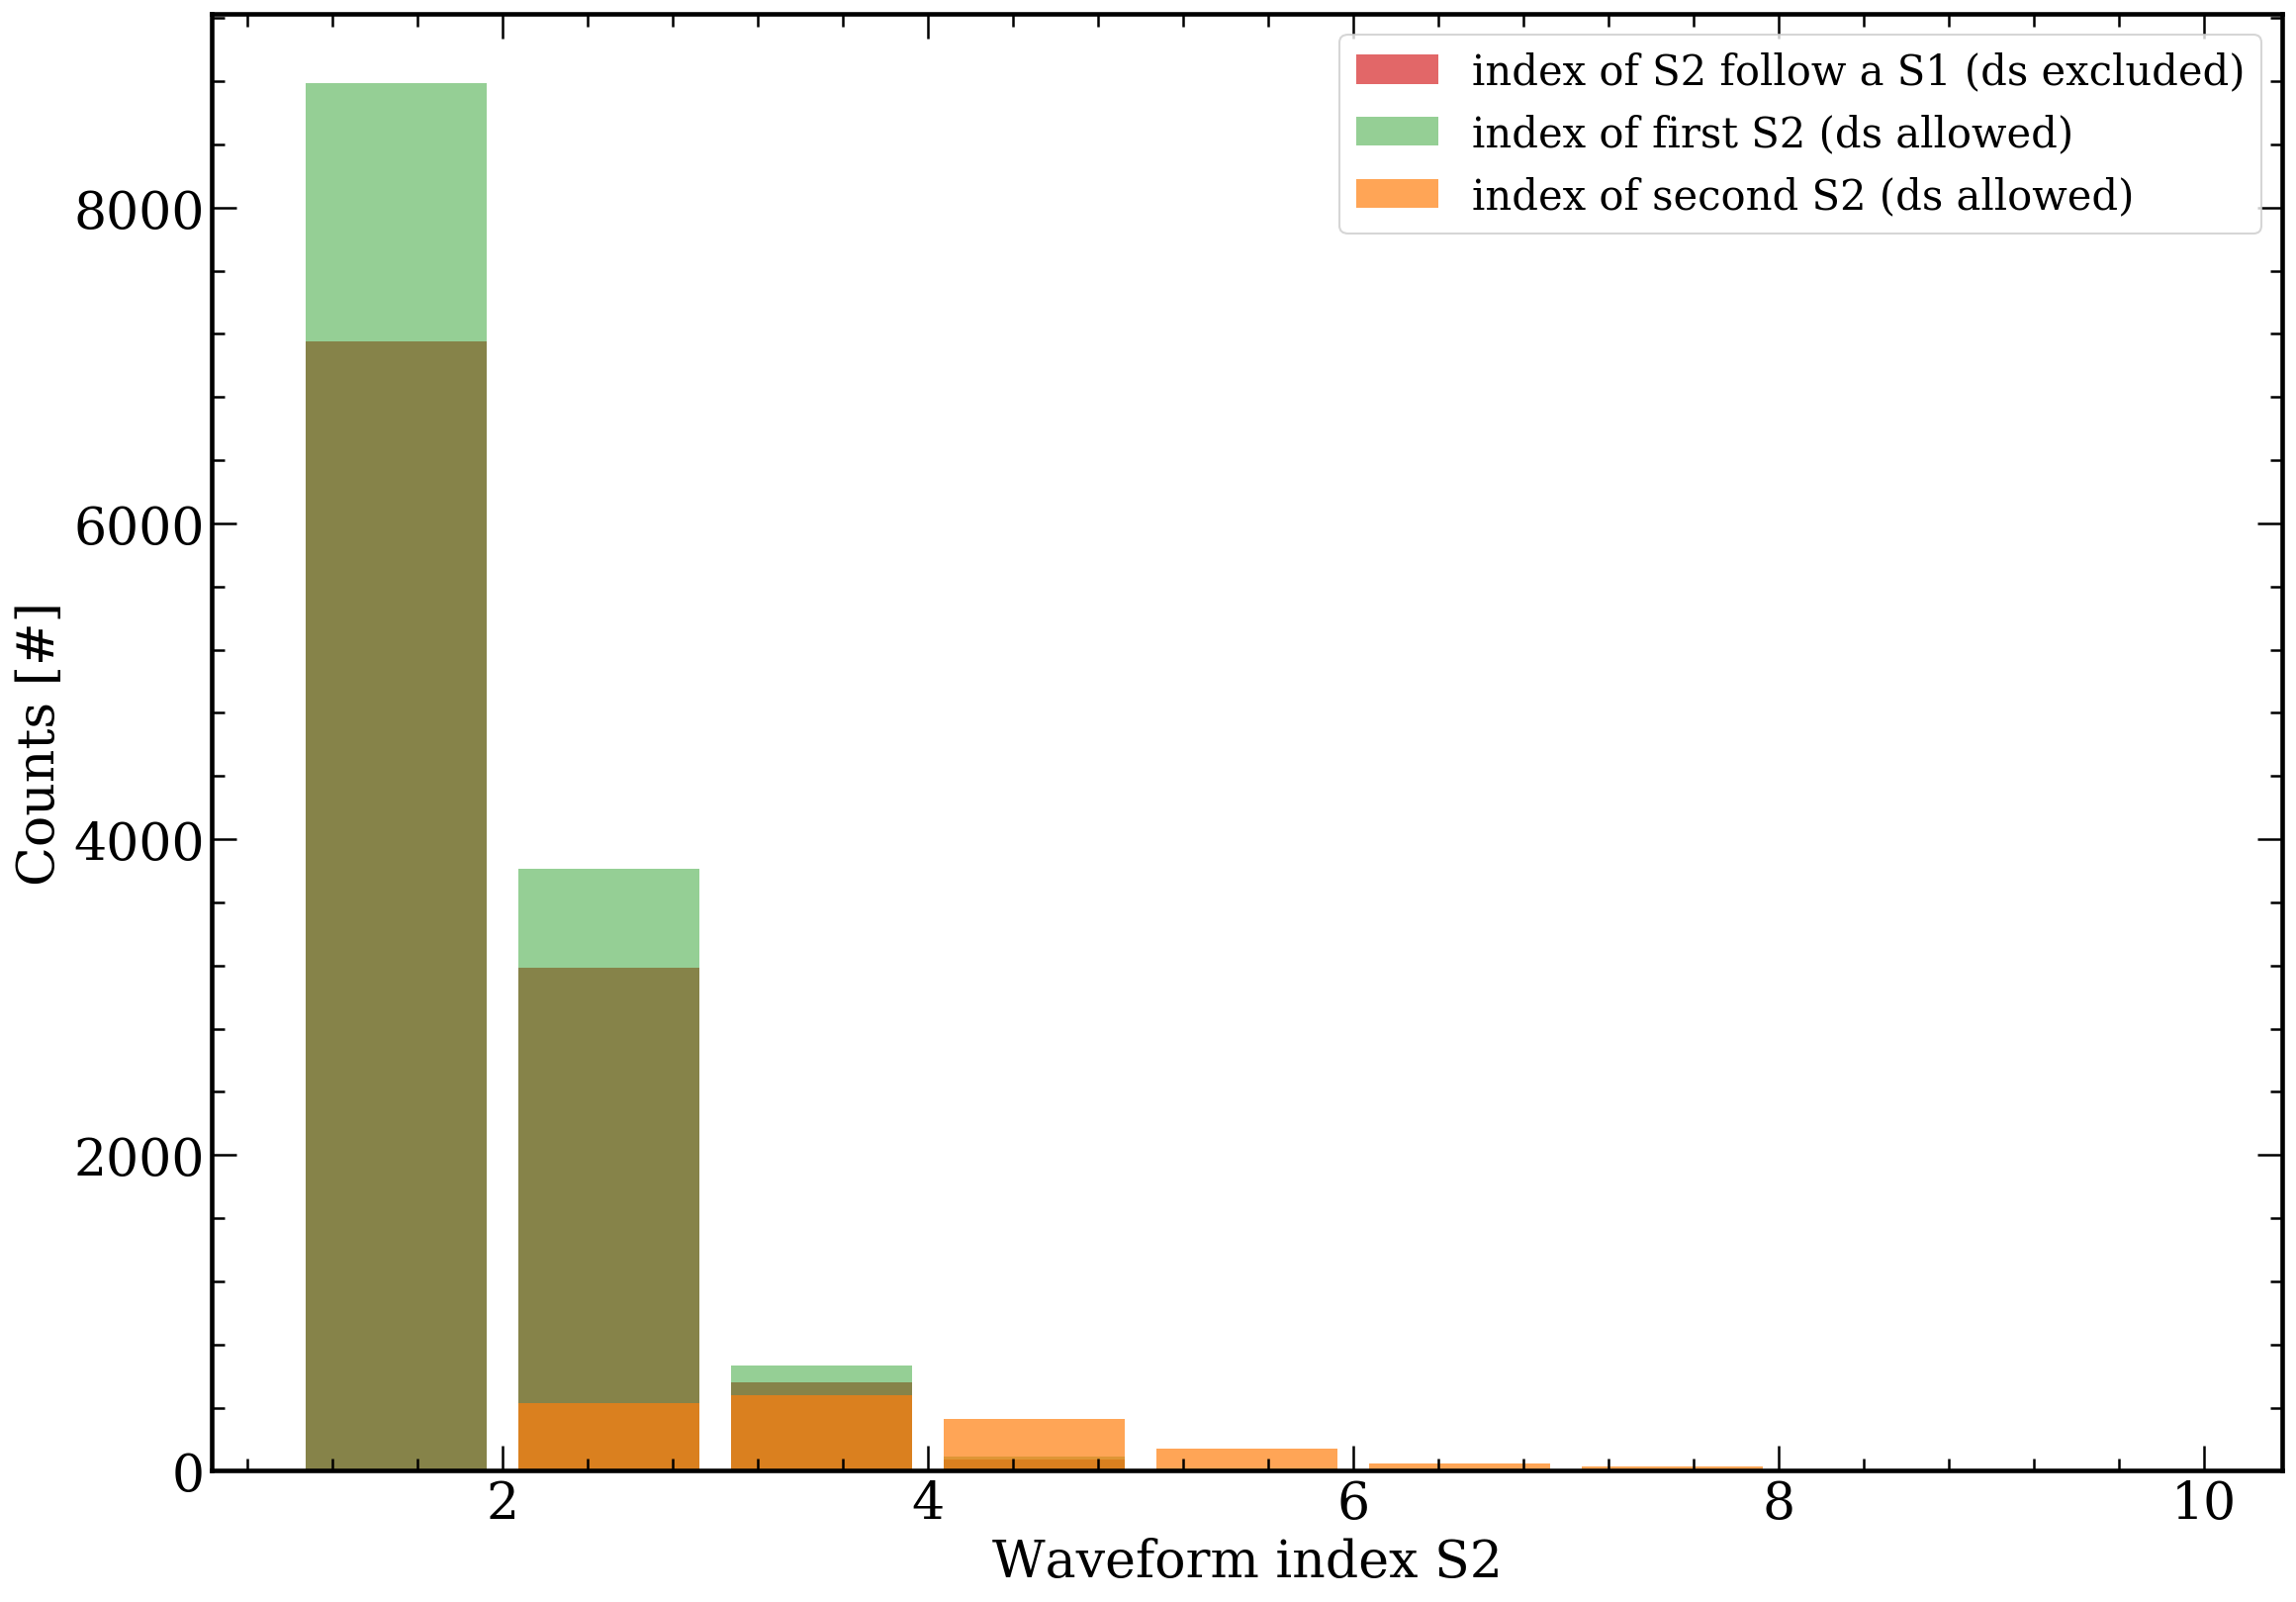

In [30]:

fig, axes = ps.styles()


#print(bincenters)
x_bins = np.linspace(1,10,10)


axes.hist(s2_index_without_ds, x_bins,rwidth=0.85,ls='dashed', color='C3', alpha = 0.7, label= 'index of S2 follow a S1 (ds excluded)')
axes.hist(s2_index_with_ds_first, x_bins,rwidth=0.85,ls = 'dashed', color='C2', alpha = 0.5, label= 'index of first S2 (ds allowed)')
axes.hist(s2_index_with_ds_second, x_bins,rwidth=0.85, ls = 'dashed', color='C1', alpha = 0.7, label= 'index of second S2 (ds allowed)')
axes.set_xlabel('Waveform index S2')
axes.set_ylabel('Counts [#]')
plt.legend(prop={'size': 20})
plt.show()